In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import torch

In [2]:
device = "cuda"

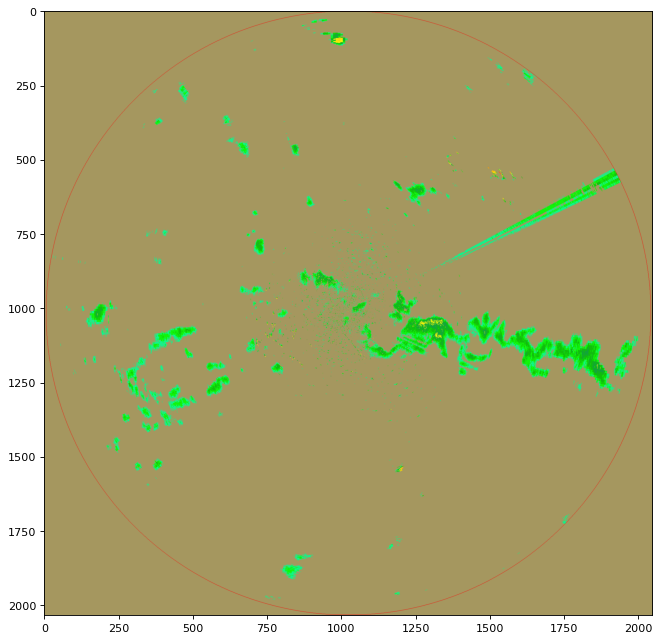

In [3]:
pic2 = cv2.imread("./data/bkk_radar_images/bkk_radar_images_1/1592461954.png")

plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
def radar_colormap():
    nws_reflectivity_colors = np.array([
    (165, 151, 95), # ND
    (0, 255, 128), # 5.5
    (0, 255, 0), # 10
    (0, 175, 0), # 15
    (0, 150, 50), # 20
    (255, 255, 0), # 25
    (255, 200, 0), # 30
    (255, 170, 0), # 35
    (255, 85, 0), # 40
    (255, 0, 0), # 45
    (255, 0, 100), # 50
    (255, 0, 255), # 55
    (255, 128, 255), # 60
    (255, 200, 255), # 65
    (255, 225, 255), # 70
    (255, 255, 255) # 75
    ])
    return torch.tensor(nws_reflectivity_colors).to(device)
    # return mpl.colors.ListedColormap(nws_reflectivity_colors)

dBZmap = torch.tensor([0,5.5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]).to(device)
dBZmap = dBZmap*255/75

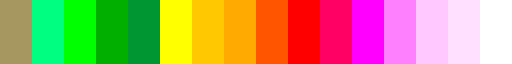

In [6]:
mpl.colors.ListedColormap(radar_colormap().cpu().numpy()/255)

In [7]:
def color2dBZ(rgb, dBZmap):
    w, h, c = rgb.shape
    rgb = rgb.reshape(-1, c)
    rgb = torch.Tensor(rgb).to(device)
    cmap = radar_colormap().unsqueeze(0).to(device)
    repeated_rgb = rgb.unsqueeze(1).repeat(1,16,1).to(device)
    rgb_diff2 = ((repeated_rgb - cmap)**2).mean(axis=2)
    return dBZmap[torch.argmin(rgb_diff2,axis=1).to(device)].reshape(w, h, 1).cpu()

In [8]:
pic3 = color2dBZ(pic2, dBZmap)

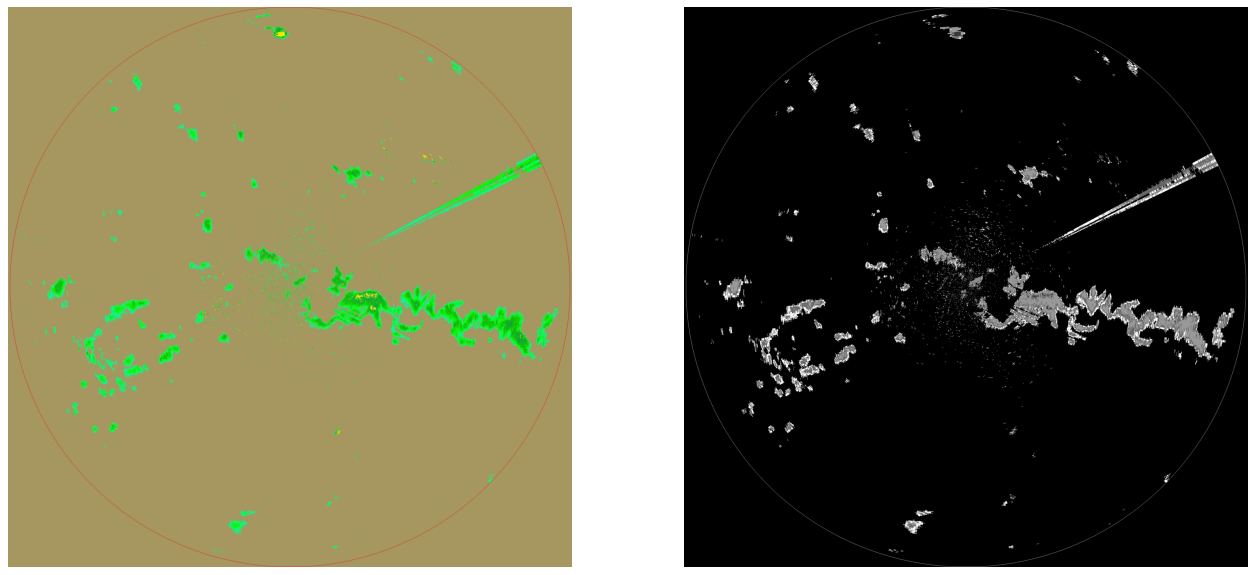

In [20]:
fig = plt.figure(figsize=(20,10), dpi=80)

plt.subplot(121)
plt.axis('off')
plt.imshow(cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.axis('off')
plt.imshow(pic3, cmap='gray')
plt.show()

In [32]:
from PIL import Image
import torchvision.transforms as T

In [22]:
filenames = pd.read_csv("./data/mycsv2_edited.csv")[['DateTime','FolderPath','FileName']]

In [25]:
filenames['FolderPath'] = "./data/bkk_radar_images/bkk_radar_images_1/"
filenames

,DateTime,FolderPath,FileName
0,2020-06-18 06:30:00,./data/bkk_radar_images/bkk_radar_images_1/,1592461954.png
1,2020-06-18 06:35:00,./data/bkk_radar_images/bkk_radar_images_1/,1592462136.png
2,2020-06-18 06:45:00,./data/bkk_radar_images/bkk_radar_images_1/,1592462768.png
3,2020-06-18 06:50:00,./data/bkk_radar_images/bkk_radar_images_1/,1592463068.png
4,2020-06-18 06:55:00,./data/bkk_radar_images/bkk_radar_images_1/,1592463277.png
...,...,...,...
4858,2020-07-09 12:50:00,./data/bkk_radar_images/bkk_radar_images_1/,1594299098.png
4859,2020-07-09 12:55:00,./data/bkk_radar_images/bkk_radar_images_1/,1594299394.png
4860,2020-07-09 13:00:00,./data/bkk_radar_images/bkk_radar_images_1/,1594299700.png
4861,2020-07-09 13:05:00,./data/bkk_radar_images/bkk_radar_images_1/,1594299994.png


In [81]:
def color2dBZ(rgb, dBZmap):
    w, h, c = rgb.shape
    rgb = rgb.reshape(-1, c)[:,:3]
    rgb = torch.Tensor(rgb).to(device)
    cmap = radar_colormap().unsqueeze(0).to(device)
    repeated_rgb = rgb.unsqueeze(1).repeat(1,16,1).to(device)
    # print(repeated_rgb.shape, cmap.shape)
    rgb_diff2 = ((repeated_rgb - cmap)**2).mean(axis=2)
    return dBZmap[torch.argmin(rgb_diff2,axis=1).to(device)].reshape(w, h, 1).cpu()

In [82]:
transform = T.ToPILImage()
newPath = "./data/bkk_radar_images_dBZ/bkk_radar_images_dBZ_1/"

def convert_n_save(idx):
    data = filenames.iloc[idx]
    rgb_img = Image.open(f"{data.FolderPath}{data.FileName}")
    rgb_img = np.asarray(rgb_img)
    dBZ_img = color2dBZ(rgb_img, dBZmap)
    dBZ_img = transform(dBZ_img.permute(2,0,1))
    dBZ_img.save(f"{newPath}{data.FileName}")    

In [ ]:
for idx in range(4863):
    convert_n_save(idx)

In [62]:
np.asarray(rgb_img)

array([[[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       [[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       [[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       ...,

       [[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       [[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       [[165